Include source package

In [1]:
# switch to the project directory
%cd ..
# working directory should be ../FSE

c:\Users\admin\Desktop\research\pdi


In [2]:
import sys
import os
module_path = os.path.abspath('src')

if module_path not in sys.path:
    sys.path.append(module_path)

Load data

In [3]:
import pandas as pd
import numpy as np

from pdi.data.constants import INPUT_PATH, CSV_DELIMITER, MISSING_VALUES

data = pd.read_csv(INPUT_PATH, sep=CSV_DELIMITER, index_col=0)
for column, val in MISSING_VALUES.items():
    data.loc[data[column] == val, column] = np.NaN

Data shape

In [5]:
print(data.shape)

(2751934, 22)


In [6]:
print(data.columns)

Index(['fTPCSignal', 'fTRDSignal', 'fTRDPattern', 'fTOFSignal', 'fBeta', 'fP',
       'fPt', 'fPx', 'fPy', 'fPz', 'fSign', 'fX', 'fY', 'fZ', 'fAlpha',
       'fTrackType', 'fTPCNClsShared', 'fDcaXY', 'fDcaZ', 'fPdgCode',
       'fIsPhysicalPrimary', 'P'],
      dtype='object')


In [24]:
((data.fPt < 1.76) & (data.fPt >= 0.12)).mean()

0.9500474938715827

In [5]:
data.fPt.quantile(.99)

2.941472

In [5]:
data.groupby("fPdgCode").fPt.quantile(.9)

fPdgCode
-2212          2.204669
-321           1.977073
-211           1.203556
-13            0.961141
-11            0.668484
 11            0.639356
 13            0.944018
 211           1.204883
 321           1.976095
 2212          2.152858
 1000010020    0.570951
 1000010030    0.811164
Name: fPt, dtype: float64

In [4]:
(data[data.fPdgCode == -2212].fPt < 2.746).mean()

0.9499770261901432

In [14]:
data.fPt.min()

0.11808118

C:\Users\admin\AppData\Local\Temp\ipykernel_5200\847949778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninety_five["fPdgCode"] = abs(ninety_five["fPdgCode"])


Text(0, 0.5, 'count')

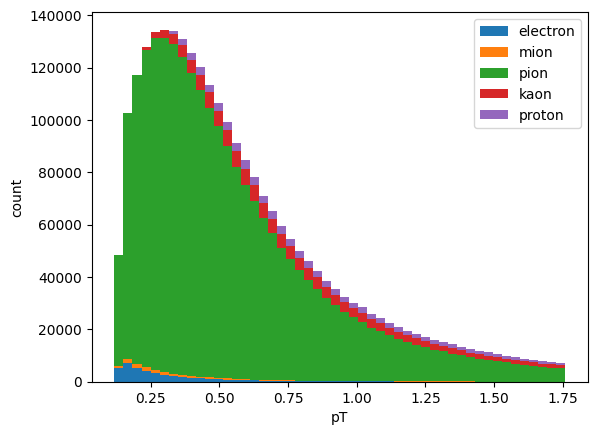

In [13]:
from matplotlib import pyplot as plt
from pdi.constants import PARTICLES_DICT

ninety_five = data[data.fPt < data.fPt.quantile(.95)]

ninety_five["fPdgCode"] = abs(ninety_five["fPdgCode"])
grouped = ninety_five.groupby("fPdgCode")

names = [PARTICLES_DICT.get(i) for (i, _) in grouped if i in PARTICLES_DICT]
indices = [j.fPt for (i, j) in grouped if i in PARTICLES_DICT]

# ninety_five.hist("fPt", bins=50, by="fPdgCode", figsize=(10, 10))

plt.hist(indices, label=names, bins=50, histtype='bar', stacked=True)
plt.legend()
plt.xlabel("pT")
plt.ylabel("count")

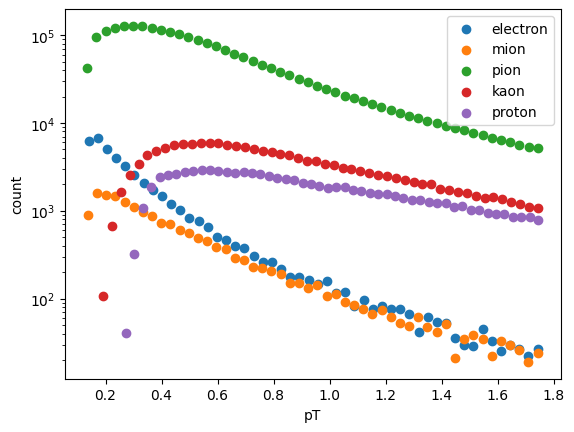

In [14]:
for id, part_dt in grouped:
    if id in PARTICLES_DICT:
        # plt.hist(part_dt.fPt, label=PARTICLES_DICT[id], bins=100, alpha=0.4, density=True, histtype='bar')
        counts, bin_edges = np.histogram(part_dt.fPt, bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        plt.scatter(bin_centers, counts, label=PARTICLES_DICT[id])
plt.yscale('log')
plt.xlabel("pT")
plt.ylabel("count")
# plt.ylabel("normalised density")
plt.legend()

Class distribution

In [5]:
classes = data["fPdgCode"].value_counts()
print(classes)

-211           1201576
 211           1199557
 321             93982
-321             90488
 2212            55748
-2212            50057
 11              21840
-11              20978
 13               8880
-13               8825
 1000010030          2
 1000010020          1
Name: fPdgCode, dtype: int64


Percent of classes used in experiments

In [6]:
chosen_classes=[-211, 211, 321, -321, 2212, -2212]

num_chosen = classes[chosen_classes].sum()
print(num_chosen / data.shape[0])

0.9780060132256079


Missing values

In [7]:
nulls = data.isnull().sum()
print(nulls)

fTPCSignal                  0
fTRDSignal            1047980
fTRDPattern           1047980
fTOFSignal            1692076
fBeta                 1692076
fP                          0
fPt                         0
fPx                         0
fPy                         0
fPz                         0
fSign                       0
fX                          0
fY                          0
fZ                          0
fAlpha                      0
fTrackType                  0
fTPCNClsShared              0
fDcaXY                      0
fDcaZ                       0
fPdgCode                    0
fIsPhysicalPrimary          0
P                           0
dtype: int64


Missing distribution pie chart

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[Index([], dtype='object'), Index(['fTRDSignal', 'fTRDPattern', 'fTOFSignal', 'fBeta'], dtype='object'), Index(['fTOFSignal', 'fBeta'], dtype='object'), Index(['fTRDSignal', 'fTRDPattern'], dtype='object')] [1021933 1010055  682021   37925]


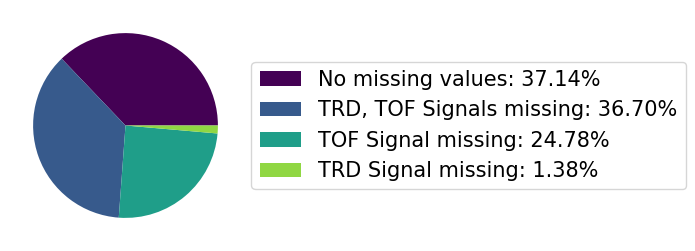

In [128]:
from matplotlib import pyplot as plt

null_rows = data.isnull().value_counts()

columns = data.columns
missing_values = [columns[list(index)] for index in null_rows.index]
print(missing_values, null_rows.values)

cmap = plt.get_cmap('viridis')
indices = np.linspace(0, float(cmap.N)/1.2, len(missing_values))
my_colors = [cmap(int(i)) for i in indices]

plt.pie(null_rows, colors=my_colors)
fig = plt.gcf()
fig.set_size_inches(3, 3)

labels = ["No missing values",
    "TRD, TOF Signals missing",
    "TOF Signal missing",
    "TRD Signal missing"]
plt.legend(
    [l + f": {100*null_rows[i]/sum(null_rows):.2f}%" for i, l in enumerate(labels)]
    , loc="center left", bbox_to_anchor=(1.0, 0.5), prop={'size': 15}
)


plt.savefig(f"reports/figures/miss_val_distr.eps", bbox_inches = "tight")
plt.savefig(f"reports/figures/miss_val_distr.png", bbox_inches = "tight")

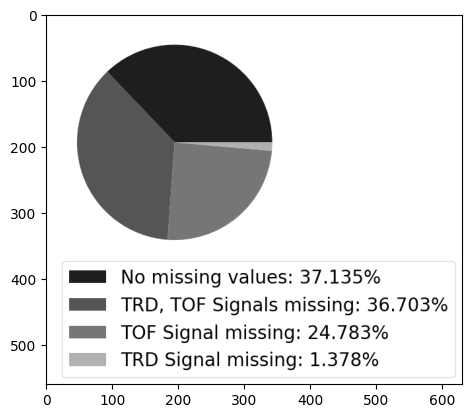

In [30]:
from PIL import Image
plt.gray()

im = Image.open('reports/figures/miss_val_distr.png').convert('L')
plt.imshow(im)
plt.show()


Percent of incomplete examples

In [9]:
all_nulls = data.isnull().any(axis=1).sum()
print(all_nulls)
print(all_nulls/data.shape[0])

1730001
0.6286491609173767


Class distribution pie chart

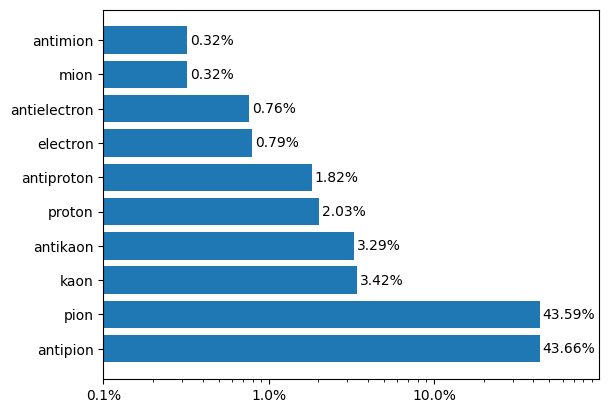

In [91]:
from pdi.constants import PARTICLES_DICT
import matplotlib
english_labels = [PARTICLES_DICT[i] for i in classes.index if i in PARTICLES_DICT]

particles = [classes[i] for i in classes.index if i in PARTICLES_DICT]
polish_labels_plural = {
    key: name.replace("anti", "anty").replace("electron", "elektron") + "y" for key, name in PARTICLES_DICT.items()
}

labels_percent = [
    polish_labels_plural[i] + f": {100*classes[i]/sum(classes):.3f}%" for i in classes.index if i in polish_labels_plural
]

particles /= sum(particles)/100

rects = plt.barh(y=english_labels, width=particles, log=True)
plt.xticks([0.1, 1, 10])
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(decimals=1))
plt.bar_label(rects, fmt="%.2f%%", padding=2)
plt.xlim(right=100)
#plt.pie(particles)
# plt.legend(
#     labels_percent, loc="lower right", bbox_to_anchor=(2.2, -0.5), prop={'size': 20}
# )

plt.savefig(f"reports/figures/part_type_distr.eps", bbox_inches = "tight")

In [97]:
distr = pd.DataFrame({i:j for i,j in zip(english_labels, particles)}, index=["percent"])
print(distr)
style = distr.style
style.format(precision=4)
style.to_latex(f"reports/tables/part_type_distr.tex",
                hrules=True,
                clines="all;data")

          antipion       pion      kaon  antikaon    proton  antiproton  \
percent  43.663013  43.589647  3.415129  3.288164  2.025778    1.818977   

         electron  antielectron      mion  antimion  
percent  0.793625      0.762301  0.322683  0.320684  
